In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Final Dataset\df_final.csv')

In [4]:
df.head(5)

,DATE,All_Employees,Permit,Cement_Price,Brick_Price,Total_Construction_Employees,Em_Ratio,GDP,Home_ownership_rate,INCOME,Industrial_Cement_Concrete_Manufactured,Labour_Population,Median_Sales_Prices,Mortgage_Rate,Monthly_House_Supply,New_Housing_Under_Construction,New_Private_Housing,Personal_Saving_Rate,HOME_PRICE,Unemployment_Rate
0,1987-01-01,5007.0,1690.0,100.1,4.694096,722.3,61.0,4722.156,63.8,3820.2,123.7373,65.4,97900.0,9.2040,6.0,1090.0,1774.0,9.4,127.930,6.6
1,1987-02-01,5038.0,1689.0,100.8,4.694096,724.2,61.1,4722.156,63.8,3845.0,123.1670,65.5,97900.0,9.0825,6.2,1096.0,1784.0,8.2,128.848,6.6
2,1987-03-01,5039.0,1704.0,101.2,4.694096,727.9,61.2,4722.156,63.8,3863.8,122.5706,65.5,97900.0,9.0350,6.0,1084.0,1726.0,8.1,129.472,6.6
3,1987-04-01,5053.0,1601.0,100.8,4.694096,728.1,61.3,4806.160,63.8,3875.4,123.5345,65.4,103400.0,9.8325,6.0,1079.0,1614.0,4.1,130.264,6.3
4,1987-05-01,5080.0,1500.0,101.2,4.688592,727.6,61.6,4806.160,63.8,3908.6,123.8454,65.7,103400.0,10.5960,6.7,1070.0,1628.0,7.8,131.126,6.3


In [5]:
df.shape

(439, 20)

#### Train Test Split & Scaling

In [6]:
X = df.drop(['DATE','HOME_PRICE'],axis=1)
y = df['HOME_PRICE']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

#### Model

In [9]:
RidgeCV_Model = RidgeCV(alphas=np.logspace(-10, 10, 100),cv=5)

RidgeCV_Model.fit(X_train, y_train)

y_pred = RidgeCV_Model.predict(X_test)

In [10]:
optimal_alpha = RidgeCV_Model.alpha_

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")
     

Optimal Alpha: 0.19630406500402683
Mean Squared Error (MSE): 44.74
RMSE: 6.688831
R-squared (R2): 1.00


#### Cross Validation

In [11]:
cv_scores = cross_val_score(RidgeCV_Model, X, y, cv=5, scoring='r2')
cv_scores = -cv_scores
print("Cross-Validation R-squared Scores:")
print(cv_scores)

Cross-Validation R-squared Scores:
[ 5.20356878  0.10655593 -0.13481523  0.24500238 -0.31825866]


In [12]:
mean_r2 = cv_scores.mean()
std_r2 = cv_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 1.0204
Standard Deviation of R-squared: 2.1006


In [13]:
print(0.1 * rmse)
print(0.1 * df['HOME_PRICE'].mean()) 

0.668883087586164
28.228757630979505


In [14]:
coefficients = RidgeCV_Model.coef_
feature_names = X.columns

feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)

In [15]:
feature_importance

Median_Sales_Prices                        48.076776
GDP                                        46.237680
Brick_Price                                40.683563
Total_Construction_Employees               35.867685
New_Housing_Under_Construction             19.840906
Labour_Population                          18.720886
Unemployment_Rate                           9.965723
Monthly_House_Supply                        5.604514
INCOME                                      4.916158
Industrial_Cement_Concrete_Manufactured     2.425030
New_Private_Housing                         0.261743
Personal_Saving_Rate                       -0.852652
Mortgage_Rate                              -2.372359
Home_ownership_rate                        -2.406462
Permit                                     -4.136587
Em_Ratio                                   -6.553593
Cement_Price                              -19.536404
All_Employees                             -22.245074
dtype: float64

#### Final Observations

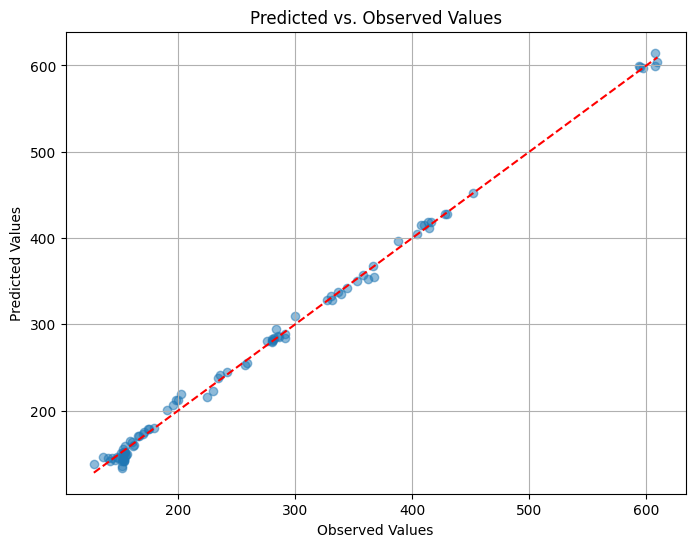

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

#### Saving the Model

In [17]:
import pickle as pkl

In [18]:
with open('RidgeCV.pkl','wb') as file:
    pkl.dump(RidgeCV_Model,file)